In [128]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [148]:
def target_dist(param):
    return stats.norm.pdf(param, loc=3, scale=2) + stats.gamma.pdf(param, a=10, scale=5) + stats.norm.pdf(param, loc=8, scale=1)

def proposal_dist(param):
    return stats.norm.pdf(param, loc=5, scale=3)

In [149]:
axis = np.arange(-5, 15)


k = max(target_dist(axis) / proposal_dist(axis))

def rejection_sampling(iter):
    samples = []

    for i in range(iter):
        z = np.random.normal(5, 3)
        u = np.random.uniform(0, k*proposal_dist(z))
    
#         print(z,' ---- ',u)
        if u<=target_dist(z):
            samples.append(z)

    return np.array(samples)



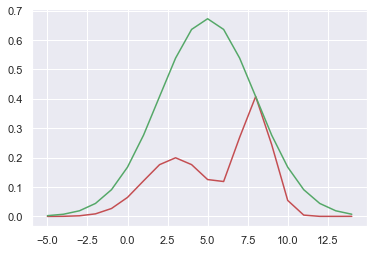

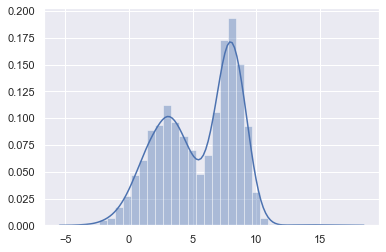

In [151]:

plt.plot(axis, target_dist(axis), color='r')
plt.plot(axis, k * proposal_dist(axis),color='g')
plt.show()

s = rejection_sampling(iter=10000)
sns.distplot(s)